In [1]:
using DFTK
using Plots
using LinearAlgebra

Good morning! Are there any questions from yesterday?

# Day 3 - Morning

- Band theory
- Density functional theory (DFT)
- inputs for DFT calculation

Today, we want to discuss some rather deep topics, but will only have time to go over them briefly. The aim is to hopefully scratch the surface and get to the heart of the main ideas that we are using throughout the remainder of the week. These concepts are really the funadmental building blocks to the kind of thinking and logic that we will go through this afternoon and we will carry through in the future.

Hopefully, you remember from yesterday the problem that we are trying to solve is simply way to complex for us to solve with any of the methods that we have available to us. So what are we going to do about it? We have to make approximations and more importantly we have to make good approximations?

**What are some approximations that you think we can make to make our system a bit easier?**

We need to make good approximations...


**What are some approximations that you think we can make to make our system a bit easier?**


We need to make good approximations...

- don't let the nuclei move
- symmetry
    - translation
    - others (rotations, inversion, etc.)
    
- treatment of valence electrons (core vs. valence)

- pseudopotentials

**Born-Oppenheimer Approximation**

The first approximation is we don't let the nuclei in our solid move. We basically ignore these and simplify encode the electromagnetic field that the nuclei create into our code and that's about it. For a finer treatment, we can go back in and adjust this but as a first approximation we are going to keep them still.

**Symmetry** 

This is the most powerful tool we have to simplify the problem. Because we are working with crystals, we can tremendously simplify our problem if we employ symmetry arguments. Basically, if I know what the crystal is like here and over there I only have to worry about it here. **Can you think of some other symmetries?** The two most common ones that we talk about is translational symmetry meaning as long as their are no defects in my crystal it doesn't matter if I slide the crystal around it will still look the same. The everything else category just means literally all of the other symmetries. This includes rotations, inverting the crystal, etc.

**Symmetry** 🔺⭕️

- translational
- everything else

We need to make good approximations...

- don't let the nuclei move
- symmetry
    - translation
    - others (rotations, inversion, etc.)
    
- treatment of valence electrons (core vs. valence)

**Core vs. valence** 

We are going to talk about this in more detail, but we can actually treat the core (inner) electrons differently than the valence electrons. We can devise an effective treatment for the core electrons by combining them with the nucleus and then only worry about the outer electrons. Of course, in our computer codes, we can specify how many electrons we want to treat as core and valence and tune this for better results or explore the differences. But let's see how we can make this distinction.

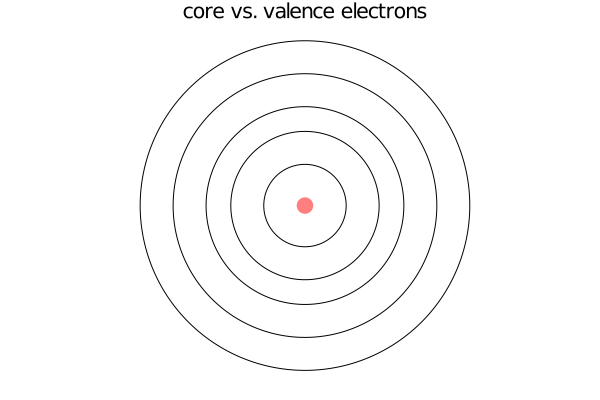

In [2]:
function circle(x, y, r)
    θ = LinRange(0, 2*π, 500)
    x .+ r*sin.(θ), y .+ r*cos.(θ)
end;
p = plot(circle(0,0,2.0), seriestype=[:shape], lw=1, legend=false, axis=nothing, grid=false, c=:white, linecolor=:black, aspect_ratio=1);
plot!(p, circle(0,0,1.6), seriestype=[:shape], lw=1, legend=false, axis=nothing, grid=false, c=:white, linecolor=:black, aspect_ratio=1);
plot!(p, circle(0,0,1.2), seriestype=[:shape], lw=1, legend=false, axis=nothing, grid=false, c=:white, linecolor=:black, aspect_ratio=1);
plot!(p, circle(0,0,0.9), seriestype=[:shape], lw=1, legend=false, axis=nothing, grid=false, c=:white, linecolor=:black, aspect_ratio=1);
plot!(p, circle(0,0,0.5), seriestype=[:shape], lw=1, legend=false, axis=nothing, grid=false, c=:white, linecolor=:black, aspect_ratio=1);
plot!(p, circle(0,0,0.1), seriestype=[:shape], lw=0, legend=false, axis=nothing, grid=false, c=:red, linecolor=:red, fillalpha=0.5, aspect_ratio=1);
plot!(title = "core vs. valence electrons")
plot!(showaxis=false)

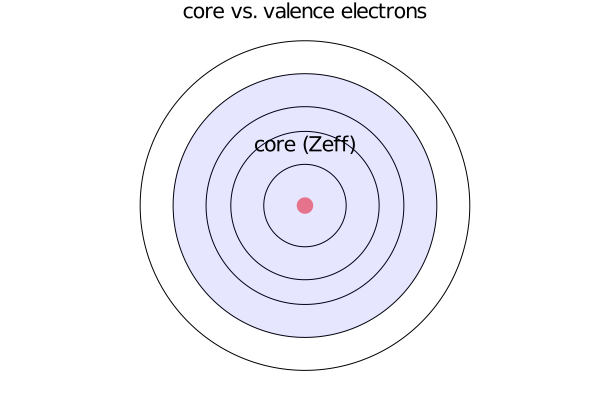

In [3]:
plot!(p, circle(0,0,1.6), seriestype=[:shape], lw=0, legend=false, axis=nothing, grid=false, c=:blue, linecolor=:blue, fillalpha=0.1, aspect_ratio=1);
annotate!(p, 0, 0.75, "core (Zeff)")
plot!(showaxis=false)

### Energy bands

**Big idea!**

Electrons in a crystal form energy bands. These bands have different characteristics and give us insight into the how the material is behaving.

Here, we brush a lot under the rug, but when we apply our mathematical formalism which has quantum mechanics built gives rise to energy bands which describes the behavior of the electrons in a solid. These are often refered to as a spaghettis.

So hopefully, if you accept this idea we can move and talk about the features of the bands that tell us the behavior the electrons in a crystalline solid.

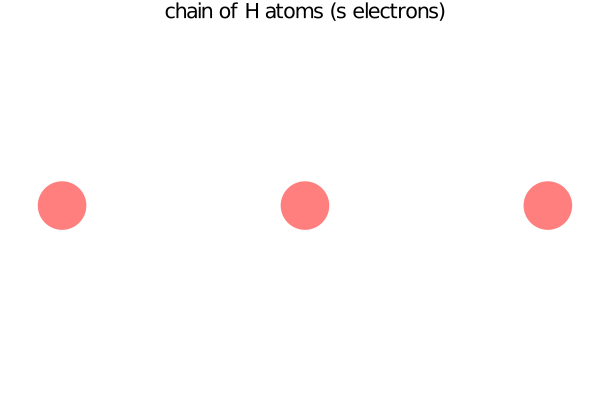

In [4]:
atoms = plot(circle(0,0,0.1), seriestype=[:shape], lw=0, legend=false, axis=nothing, grid=false, c=:red, linecolor=:red, fillalpha=0.5, aspect_ratio=1);
plot!(atoms, circle(-1.0,0,0.1), seriestype=[:shape], lw=0, legend=false, axis=nothing, grid=false, c=:red, linecolor=:red, fillalpha=0.5, aspect_ratio=1);
plot!(atoms, circle(1.0,0.0,0.1), seriestype=[:shape], lw=0, legend=false, axis=nothing, grid=false, c=:red, linecolor=:red, fillalpha=0.5, aspect_ratio=1);
plot!(title="chain of H atoms (s electrons)")
plot!(showaxis=false)

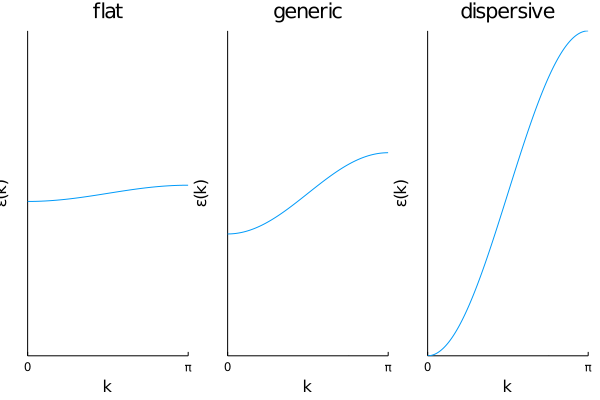

In [5]:
kx = collect(0:0.01:π)
generic = plot(kx, -0.5.*cos.(kx))
disperse = plot(kx, -2 .* cos.(kx))
flat = plot(kx, -0.1 .* cos.(kx))
plot(flat, generic, disperse, layout = (1,3), legend=false, ylim = (-2, 2), ylabel="ε(k)", xlabel="k", grid=false)
plot!(xticks=([0:π:2*π;], ["0", "\\pi"]), xlim=(0, π),yticks=false)
plot!(titles=["flat" "generic" "dispersive"])

## summary of bands
- bands tell us alot of what's going!
    - flat bands = atoms are localized
    - dispersive bands = atoms are strongly interacting

## Density functional theory

A theory and computational tool to calculate the ground state properties of a solid.

- a theory that combines everything that we've discussed together and offers a set of equations that can be solved self-consistently

**Key idea**: Take a hard interacting problem that can be mapped onto an easy non-interacting problem

- we know how to go back and forth between easy and hard problem
- we don't know how exactly how to fake the interactions
- Everything depends on the density of electrons, but sometimes important information is carried in subtle changes in the electron density

1. Electron density $\rho$
2. Plug into Kohn-Sham (DFT) equations and solve
3. Get out new $\rho$
4. Check $|\rho_{out} - \rho_{in}| < \text{tolerance}$
5. If no, repeat. Otherwise converged!

**learn by example (and by doing this afternoon)**

Goal: put it all together to see how we get a metal and an insulator. This morning, we will look at a metal (Na).

**Na**

- Sodium (Na) has one valence electron (3s$^{1}$) and 10 core electrons (1s$^{2}$2s$^{2}$2p$^{6}$)
- Each unit cell only has one Na atom

A friendly material for identifying key features.

- Each band can carry 2 electrons
- one electron per cell

**Prediction:** we expect there to be one band 1/2 filled on average. What does this look?

In [6]:
a = 3.715/0.53;
lattice = [[a 0 0]; [0 a 0]; [0 0 a]];
Na = ElementPsp(:Na, psp=load_psp(:Na, functional="lda"));
atoms = [Na => [[0.0, 0.0, 0.0], [0.5, 0.5, 0.0], [0.5, 0.0, 0.5], [0.0, 0.5, 0.5]]];
model = model_LDA(lattice, atoms, temperature=0.01);
basis = PlaneWaveBasis(model, 15, kgrid=[10, 10, 10]);
@time scfres=self_consistent_field(basis);

n     Free energy       Eₙ-Eₙ₋₁     ρout-ρin   Diag
---   ---------------   ---------   --------   ----
  1   -0.782622283395         NaN   6.72e-02    1.5 
  2   -0.782975370480   -3.53e-04   1.44e-02    1.0 
  3   -0.783024062633   -4.87e-05   2.99e-04    1.7 
  4   -0.783027119204   -3.06e-06   1.22e-04    3.7 
  5   -0.783027122495   -3.29e-09   4.15e-06    1.6 


Computing bands along kpath:
       Γ -> X -> W -> K -> Γ -> L -> U -> W -> L -> K  and  U -> X


Diagonalising Hamiltonian kblocks: 100%|████████████████| Time: 0:00:10


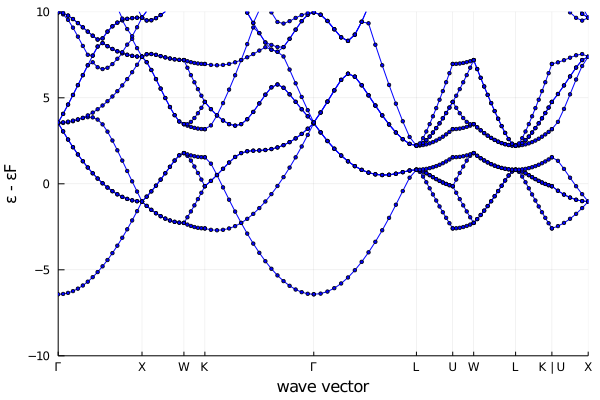

In [15]:
bands = plot_bandstructure(scfres, kline_density=10)
ylabel!("ε - εF")

In [14]:
println("Avg. occupation: $(sum(sum(hcat(scfres.occupation...), dims=2)/(4*35)))")

Avg. occupation: 0.9499478975713591


A **metallic** is system is one who's bands are partially filled!

An **insulating** system is one who's bands are fully filled!